In [43]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN, KMeans
import matplotlib.pyplot as plt

In [7]:
file = 'C:/Users/yhn03/MulticampusProject/3rd/color/cluster_color.csv'
df = pd.read_csv(file, index_col=0)
df

,cluster_R,cluster_G,cluster_B,color
Unnamed: 0,,,,
0,32,33,33,검정색
1,154,26,31,버건디색
2,212,213,212,밝은회색
3,154,45,51,버건디색
4,230,230,228,밝은회색
...,...,...,...,...
10822,130,146,8,올리브색
10823,143,162,4,올리브색
10824,35,68,108,남색


In [8]:
df_train = df[['cluster_R', 'cluster_G', 'cluster_B']]

In [21]:
eps_lst = np.arange(3, 25, 0.5)
min_samples_lst = np.arange(3, 20, 1)

for eps in eps_lst:
    for min_samples in min_samples_lst:
        model = DBSCAN(eps=eps, min_samples=min_samples)
        model.fit_predict(df_train)

        print(f'eps: {eps}\tmin_samples: {min_samples}\t색깔 수: {len(set(model.labels_))}\t군집에 속하지 않은 색깔 수: {len([n for n in model.labels_ if n == -1])}')

eps: 3.0	min_samples: 3	색깔 수: 97	군집에 속하지 않은 색깔 수: 3886
eps: 3.0	min_samples: 4	색깔 수: 41	군집에 속하지 않은 색깔 수: 4133
eps: 3.0	min_samples: 5	색깔 수: 18	군집에 속하지 않은 색깔 수: 4300
eps: 3.0	min_samples: 6	색깔 수: 13	군집에 속하지 않은 색깔 수: 4396
eps: 3.0	min_samples: 7	색깔 수: 5	군집에 속하지 않은 색깔 수: 4497
eps: 3.0	min_samples: 8	색깔 수: 4	군집에 속하지 않은 색깔 수: 4534
eps: 3.0	min_samples: 9	색깔 수: 3	군집에 속하지 않은 색깔 수: 4569
eps: 3.0	min_samples: 10	색깔 수: 3	군집에 속하지 않은 색깔 수: 4595
eps: 3.0	min_samples: 11	색깔 수: 3	군집에 속하지 않은 색깔 수: 4657
eps: 3.0	min_samples: 12	색깔 수: 5	군집에 속하지 않은 색깔 수: 4707
eps: 3.0	min_samples: 13	색깔 수: 4	군집에 속하지 않은 색깔 수: 4800
eps: 3.0	min_samples: 14	색깔 수: 5	군집에 속하지 않은 색깔 수: 4844
eps: 3.0	min_samples: 15	색깔 수: 6	군집에 속하지 않은 색깔 수: 4898
eps: 3.0	min_samples: 16	색깔 수: 6	군집에 속하지 않은 색깔 수: 4950
eps: 3.0	min_samples: 17	색깔 수: 6	군집에 속하지 않은 색깔 수: 5009
eps: 3.0	min_samples: 18	색깔 수: 6	군집에 속하지 않은 색깔 수: 5061
eps: 3.0	min_samples: 19	색깔 수: 8	군집에 속하지 않은 색깔 수: 5120
eps: 3.5	min_samples: 3	색깔 수: 121	군집에 속하지 않은 색깔 수: 3597
eps: 3.5	min

In [84]:
model2 = KMeans(n_clusters=100)
model2.fit(df_train)

KMeans(n_clusters=100)

In [85]:
df_train['k_means'] = model2.predict(df_train)

In [91]:
df_k_means = df_train.groupby('k_means').mean().applymap(lambda x: round(x))

In [87]:
df_train.groupby('k_means').count()

,cluster_R,cluster_G,cluster_B,cluster
k_means,,,,
0,71,71,71,71
1,243,243,243,243
2,31,31,31,31
3,241,241,241,241
4,311,311,311,311
...,...,...,...,...
95,323,323,323,323
96,12,12,12,12
97,189,189,189,189


In [92]:
df_k_means

,cluster_R,cluster_G,cluster_B,cluster
k_means,,,,
0,106,9,19,4
1,189,189,188,0
2,140,129,116,6
3,81,81,83,0
4,28,28,29,0
...,...,...,...,...
95,216,216,215,0
96,6,61,37,-1
97,93,93,94,0


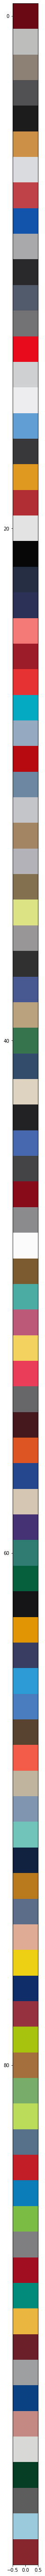

In [99]:
plt.figure(figsize=(40, 100))
plt.imshow([[[row['cluster_R'], row['cluster_G'], row['cluster_B']]] for idx, row in df_k_means.iterrows()])
plt.show()

In [1]:
colors = ['고동',
'흰색',
'회색',
'진한회색',
'검정',
'황토',
'흰색',
'빨강',
'파랑',
'밝은회색',
'검정',
'청회색',
'회색',
'빨강',
'흰색',
'흰색',
'하늘',
'검정',
'황토',
'빨강',
'흰색',
'검정',
'남색',
'남색',
'분홍',
'빨강',
'빨강',
'하늘',
'민트',
'빨강',
'발블',
'밝은회색',
'황갈색',
'밝은회색',
'모카',
'연두',
'회색',
'검정',
'발블',
'베이지',
'초록',
'남색',
'아이보리',
'검정',
'파랑',
'진한회색',
'빨강',
'회색',
'흰색',
'갈색',
'민트',
'분홍',
'노랑',
'분홍',
'회색',
'고동',
'주황',
'파랑',
'아이보리',
'보라',
'초록',
'초록',
'검정',
'황토',
'남색',
'하늘',
'파랑',
'갈색',
'자몽',
'베이지',
'발블',
'민트',
'남색',
'황토',
'발블',
'살구',
'노랑',
'파랑',
'빨강',
'연두',
'갈색',
'초록',
'연두',
'발블',
'빨강',
'파랑',
'연두',
'회색',
'빨강',
'청록',
'노랑',
'빨강',
'밝은회색',
'파랑',
'분홍',
'흰색',
'초록',
'진한회색',
'하늘',
'빨강']

In [100]:
df_k_means['color'] = colors

In [101]:
df_k_means

,cluster_R,cluster_G,cluster_B,cluster,color
k_means,,,,,
0,106,9,19,4,고동
1,189,189,188,0,밝은회색1
2,140,129,116,6,회색
3,81,81,83,0,진한회색
4,28,28,29,0,검정
...,...,...,...,...,...
95,216,216,215,0,흰색
96,6,61,37,-1,초록
97,93,93,94,0,진한회색


In [103]:
df_result = df_train.merge(df_k_means, left_on='k_means', right_index=True, how='left')

In [105]:
df_result = df_result[['cluster_R_x', 'cluster_G_x', 'cluster_B_x', 'color']]

In [106]:
df_result.columns = ['cluster_R', 'cluster_G', 'cluster_B', 'color']

In [107]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10827 entries, 0 to 10826
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   cluster_R  10827 non-null  int64 
 1   cluster_G  10827 non-null  int64 
 2   cluster_B  10827 non-null  int64 
 3   color      10827 non-null  object
dtypes: int64(3), object(1)
memory usage: 422.9+ KB


In [108]:
df_result.to_csv('color_cluster.csv')